# Imports

In [1]:
# Import Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import sys
import random
from scipy.spatial import distance
import copy
import warnings
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor

#ignore warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [2]:
# Import Data
Weekly_Case = pd.read_csv('data_table_for_weekly_case_trends__the_united_states.csv')
Weekly_Death = pd.read_csv('data_table_for_weekly_death_trends__the_united_states.csv')
Variant_Proportion = pd.read_csv('SARS-CoV-2_Variant_Proportions.csv')
Vaccinated_People = pd.read_csv('trends_in_number_of_covid19_vaccinations_in_the_us.csv')

# Data Visualization & Analysis

### Weekly Cases trend :: Numerical Variable

In [3]:
Variant_Proportion.drop(Variant_Proportion.loc[Variant_Proportion['usa_or_hhsregion']!='USA'].index, inplace=True)
#Look at only USA data 
#https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

Code from : https://www.geeksforgeeks.org/how-to-filter-dataframe-rows-based-on-the-date-in-pandas/

In [4]:
# Cleaning Of Weekly Cases
# Convert the date to datetime64
Weekly_Case['Date'] = pd.to_datetime(Weekly_Case['Date'], format='%b %d %Y')
  
# Filter data between two dates
filtered_Weekly_Case = Weekly_Case.loc[(Weekly_Case['Date'] >= '01 01 2022')
                     & (Weekly_Case['Date'] < '10 26 2022')]

#remove unecessary coulums
filtered_Weekly_Case=filtered_Weekly_Case.drop(["Historic Cases", "State"], axis=1)

# Display
filtered_Weekly_Case.head()

,Date,Weekly Cases
0,2022-10-19,260808
1,2022-10-12,265175
2,2022-10-05,309887
3,2022-09-28,342162
4,2022-09-21,395071


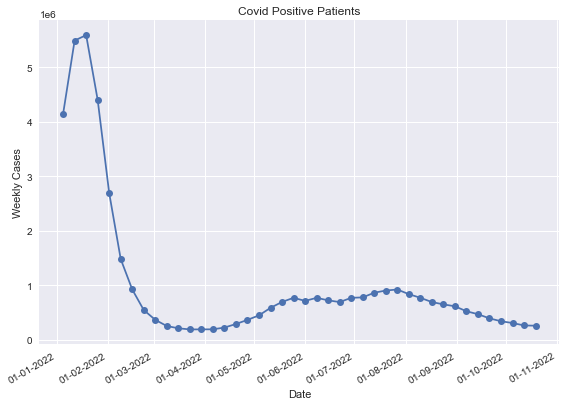

In [5]:
# https://saralgyaan.com/posts/plot-time-series-in-python-matplotlib-tutorial-chapter-8/
Weekly_Cases_Data = pd.DataFrame(filtered_Weekly_Case[['Weekly Cases','Date']])
Weekly_Cases_Data['Date'] = pd.to_datetime(Weekly_Cases_Data['Date'])
plt.plot_date(Weekly_Cases_Data['Date'],Weekly_Cases_Data['Weekly Cases'],  linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Covid Positive Patients')
plt.xlabel('Date')
plt.ylabel('Weekly Cases')
plt.show()

<AxesSubplot:xlabel='Weekly Cases'>

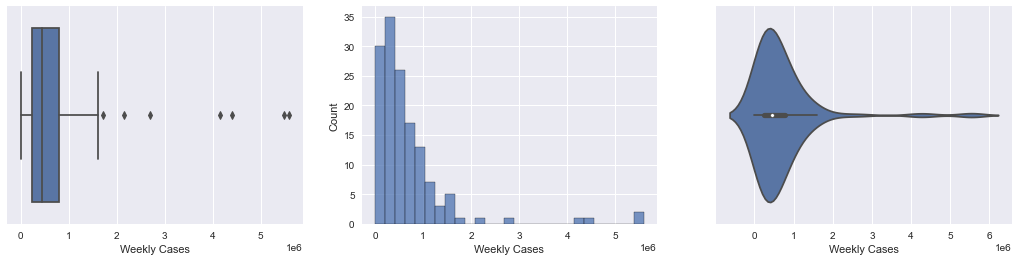

In [6]:
#visualization before data cleaning
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[0])
sb.histplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[1])
sb.violinplot(data = Weekly_Case, x=Weekly_Case['Weekly Cases'], ax = axes[2])

In [7]:
# Cleaning Of Weekly Deaths
# Convert the date to datetime64
Weekly_Death['Date'] = pd.to_datetime(Weekly_Death['Date'], format='%b %d %Y')
  
# Filter data between two dates
filtered_Weekly_Death = Weekly_Death.loc[(Weekly_Death['Date'] >= '01 01 2022')
                     & (Weekly_Death['Date'] < '10 26 2022')]

#remove unecessary coulums
filtered_Weekly_Death=filtered_Weekly_Death.drop(["Historic Deaths", "State"], axis=1)

# Display
filtered_Weekly_Death.head()



,Date,Weekly Deaths
0,2022-10-19,2566
1,2022-10-12,2582
2,2022-10-05,2994
3,2022-09-28,2974
4,2022-09-21,3158


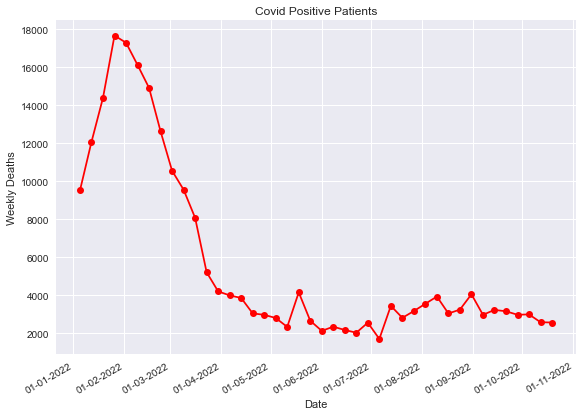

In [8]:
Weekly_Death_Data = pd.DataFrame(filtered_Weekly_Death[['Weekly Deaths','Date']])
Weekly_Death_Data['Date'] = pd.to_datetime(Weekly_Death_Data['Date'])
plt.plot_date(Weekly_Death_Data['Date'],Weekly_Death_Data['Weekly Deaths'],  linestyle='solid', color = 'Red')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Covid Positive Patients')
plt.xlabel('Date')
plt.ylabel('Weekly Deaths')
plt.show()

<AxesSubplot:xlabel='Weekly Deaths'>

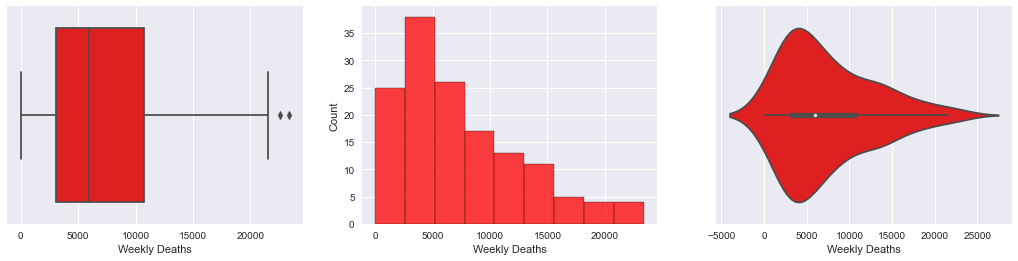

In [9]:
#visualization before data cleaning
f, axes = plt.subplots(1, 3, figsize=(18, 4))
sb.boxplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[0], color = 'Red')
sb.histplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[1], color = 'Red')
sb.violinplot(data = Weekly_Death, x=Weekly_Death['Weekly Deaths'], ax = axes[2], color = 'Red')

## SARS-COV Variant :: Categorical

In [10]:
# Cleaning Of Variant Proportions
# Convert the date to datetime64
Variant_Proportion['week_ending'] = pd.to_datetime(Variant_Proportion['week_ending'], format= '%m/%d/%Y %H:%M')
# Filter data between two dates
filtered_Variant_Proportion = Variant_Proportion.loc[(Variant_Proportion['week_ending'] >= '01/01/2022')& (Variant_Proportion['week_ending'] <= '10/22/2022')]

#remove unecessary coulums
filtered_Variant_Proportion=filtered_Variant_Proportion[["variant","week_ending","share"]]
shareandvariant=filtered_Variant_Proportion[["variant","share"]]

#sort data based on variant and time
filtered2_Variant_Proportion=filtered_Variant_Proportion.groupby('variant')
'''
for i in week_ending,
  filtered_Variant_Proportion['variant'].value_counts()

final_filtered_Variant_Proportion = filtered_Variant_Proportion.groupby("state")["last_name"].mean()


listofi=[]
for i in range(0,602,14):
  listofi.append(i)
  listofi.append(i+1)
filtered2_Variant_Proportion = pd.DataFrame(filtered_Variant_Proportion.groupby(["week_ending","variant"])["share"].max().T)
final_filtered_Variant_Proportion=filtered2_Variant_Proportion.iloc[listofi]
'''
filtered2_Variant_Proportion = pd.DataFrame(filtered_Variant_Proportion.groupby(["week_ending","variant"])["share"].nlargest(n=2).T)
filtered2_Variant_Proportion
# Display

# out = final_filtered_Variant_Proportion.pivot(index='week_ending', columns='variant', values='share')


# top2variants=final_filtered_Variant_Proportion
#variant = filtered_Variant_Proportion.groupby(["week_ending","variant"])
#final_filtered_Variant_Proportion.pivot_table(final_filtered_Variant_Proportion, values = 'share', index=['week_ending','variant']).reset_index()

#filtered_Variant_Proportion.melt(id_vars=["week_ending", "variant"])
#final_filtered_Variant_Proportion.size()

share
week_ending variant                 
2022-01-01  B.1.1.529 7894  0.953697
                      8085  0.922643
            B.1.617.2 7862  0.107090
                      7840  0.103977
            BA.1.1    8098  0.465257
...                              ...
2022-10-22  BA.5      11    0.621679
            BF.7      1     0.066507
            BQ.1      2     0.093988
            BQ.1.1    4     0.071613
            Other     10    0.000186

[1190 rows x 1 columns]

In [11]:

#variant = filtered_Variant_Proportion.groupby(["week_ending","variant"])
#print(variant)
#for variant, frame in variant:
    #print(f"First 2 entries for {state!r}")
    #print("------------------------")
    #print(frame.head(2), end="\n\n")

In [12]:
filtered_Weekly_Death.head()

,Date,Weekly Deaths
0,2022-10-19,2566
1,2022-10-12,2582
2,2022-10-05,2994
3,2022-09-28,2974
4,2022-09-21,3158


## Vaccinated People :: Numerical

In [13]:
# Cleaning Of Variant Proportions
# Convert the date to datetime64
Vaccinated_People['Date'] = pd.to_datetime(Vaccinated_People['Date'], format= '%m/%d/%Y')
  
# Filter data between two dates
filtered_Vaccinated_People = Vaccinated_People.loc[(Vaccinated_People['Date'] >= '01 05 2022')
                     & (Vaccinated_People['Date'] <= '10 19 2022')]

filtered_Vaccinated_People = filtered_Vaccinated_People.iloc[::7, :]

#remove unecessary coulums
filtered_Vaccinated_People = filtered_Vaccinated_People.iloc[:, [0, 5, 6, 7, 8, 12, 24]].reset_index(drop = True)

#display
filtered_Vaccinated_People.head()

,Date,Percent of Total Pop with at least One Dose,Percent of People with Complete Primary Series,Percent of People with a Completed Primary Series who have a First Booster Dose,Administered,People Receiving 1 or More Doses Cumulative,Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose
0,2022-10-18,80.0,68.2,49.1,632905664,265591330,40.6
1,2022-10-11,79.9,68.2,49.1,630145435,265329365,39.6
2,2022-10-04,79.8,68.1,48.9,626055729,264942526,38.3
3,2022-09-27,79.7,68.0,48.8,622068616,264564363,37.1
4,2022-09-20,79.6,67.9,48.7,618116882,264176559,36.0


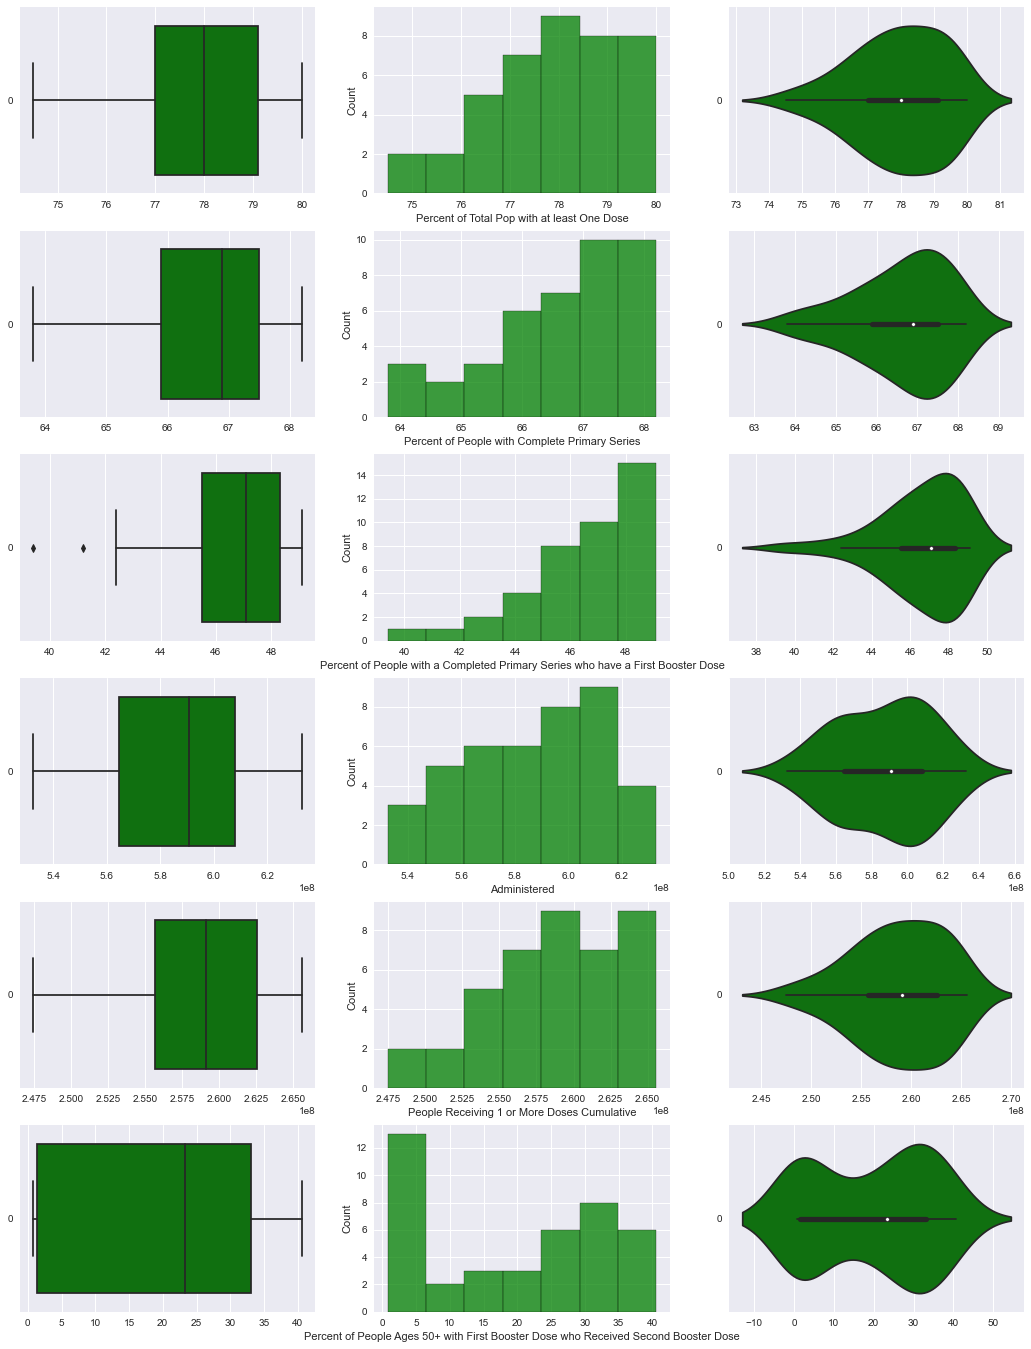

In [14]:
#visualization
f, axes = plt.subplots(6, 3, figsize=(18, 24))

count = 0
for var in filtered_Vaccinated_People:
    if(var == 'Date'):
        continue
    sb.boxplot(data = filtered_Vaccinated_People[var], orient = "h", ax = axes[count,0], color = 'Green')
    sb.histplot(data = filtered_Vaccinated_People[var], ax = axes[count,1], color = 'Green')
    sb.violinplot(data = filtered_Vaccinated_People[var], orient = "h", ax = axes[count,2], color = 'Green')
    count += 1

In [15]:
#plt.plot_date(filtered_Vaccinated_People['Date'],filtered_Vaccinated_People['7-Day Avg Daily Count of People Completing a Primary Series'],  linestyle='solid', color = 'green')
#plt.gcf().autofmt_xdate()
#date_format = mpl_dates.DateFormatter('%d-%m-%Y')
#plt.gca().xaxis.set_major_formatter(date_format)
#plt.tight_layout()
#plt.title('Vaccinated People')
#plt.xlabel('Date')
#plt.ylabel('Weekly Count')
#plt.show()

##Variant Proportion

In [16]:
filtered_Variant_Proportion.head()

,variant,week_ending,share
0,BA.4.6,2022-10-22,0.113205
1,BF.7,2022-10-22,0.066507
2,BQ.1,2022-10-22,0.093988
3,BA.2.75,2022-10-22,0.015594
4,BQ.1.1,2022-10-22,0.071613


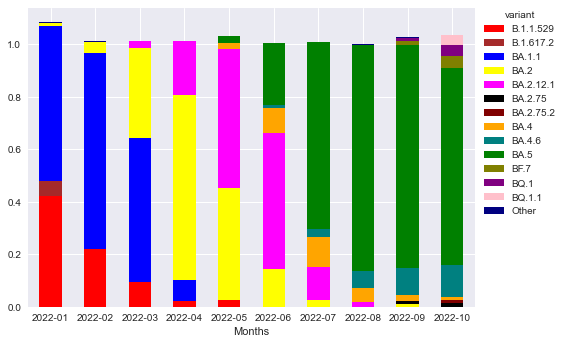

In [17]:
filtered_Variant_Proportion.week_ending = pd.to_datetime(filtered_Variant_Proportion.week_ending)
filtered_Variant_Proportion.month = filtered_Variant_Proportion.week_ending.dt.to_period('M')

# change the insignificant values to Other
filtered_Variant_Proportion.loc[(filtered_Variant_Proportion['share'] < 0.01), "variant"] = "Other"
crosstab = pd.crosstab(filtered_Variant_Proportion.month, filtered_Variant_Proportion.variant, values = filtered_Variant_Proportion.share, aggfunc = np.mean)

color = ['Red','Brown','Blue','Yellow','Magenta','Black','Maroon','Orange','Teal','Green','Olive','Purple','Pink','Navy']
crosstabplot = crosstab.plot(kind='bar', rot=0, stacked = True, xlabel = 'Months', color = color)
crosstabplot.legend(title='variant', bbox_to_anchor=(1, 1.02),loc='upper left')

## Final DF

In [18]:
AscendingVariant = filtered_Variant_Proportion.sort_values(by=['week_ending'], ascending=True)
VariantWeek = pd.crosstab(filtered_Variant_Proportion.week_ending, filtered_Variant_Proportion.variant,values=filtered_Variant_Proportion.share.round(2), aggfunc = 'mean')

VariantWeek =  VariantWeek.reset_index()

AscendingVaccination = filtered_Vaccinated_People.sort_values(by='Date', ascending = True)

AscendingVaccination = AscendingVaccination.reset_index()

In [19]:
WeekDeath = pd.concat([filtered_Weekly_Death,filtered_Weekly_Case.drop('Date',axis=1)],axis=1)
WeekDeath = WeekDeath.sort_values(by=['Date'], ascending=True)
WeekDeath = WeekDeath.reset_index()
VariantWeek = VariantWeek.fillna(0)
WeekDeathVar = pd.concat([WeekDeath.drop(columns=WeekDeath.columns[0], axis=1),VariantWeek.drop(columns=VariantWeek.columns[0:1], axis=1)],axis=1)

FinalDF = pd.concat([WeekDeathVar,AscendingVaccination.drop(columns=AscendingVaccination.columns[0:2],axis = 1)], axis=1)

FinalDF = FinalDF.drop([41,42])

FinalDF

,Date,Weekly Deaths,Weekly Cases,B.1.1.529,B.1.617.2,BA.1.1,BA.2,BA.2.12.1,BA.2.75,BA.2.75.2,...,BF.7,BQ.1,BQ.1.1,Other,Percent of Total Pop with at least One Dose,Percent of People with Complete Primary Series,Percent of People with a Completed Primary Series who have a First Booster Dose,Administered,People Receiving 1 or More Doses Cumulative,Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose
0,2022-01-05,9523.0,4144938.0,0.501905,0.098571,0.451111,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.003128,74.5,63.8,39.4,532523597.0,247456745.0,0.8
1,2022-01-12,12076.0,5489860.0,0.486341,0.042927,0.530278,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000955,75.1,64.1,41.2,539630858.0,249319876.0,0.8
2,2022-01-19,14401.0,5589403.0,0.420488,0.020000,0.618649,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000055,75.5,64.4,42.4,545207423.0,250756791.0,0.9
3,2022-01-26,17675.0,4401234.0,0.375750,0.000000,0.660811,0.000000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.001735,75.9,64.7,43.3,549748283.0,251888888.0,0.9
4,2022-02-02,17299.0,2692886.0,0.324615,0.000000,0.697027,0.010000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.003333,76.1,65.0,43.8,553157166.0,252744602.0,1.0
5,2022-02-09,16128.0,1482175.0,0.277632,0.000000,0.729730,0.018000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.001571,76.3,65.2,44.2,556064267.0,253483983.0,1.0
6,2022-02-16,14920.0,924965.0,0.222973,0.000000,0.750000,0.020541,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000000,76.5,65.4,44.6,558534694.0,254102352.0,1.1
7,2022-02-23,12631.0,547613.0,0.198333,0.000000,0.761389,0.040000,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000000,76.7,65.6,44.9,560571488.0,254614257.0,1.2
8,2022-03-02,10556.0,367716.0,0.172286,0.000000,0.756000,0.070857,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000000,76.8,65.7,45.1,562109987.0,255013763.0,1.2
9,2022-03-09,9560.0,254708.0,0.142647,0.000000,0.717353,0.137941,0.000000,0.000000,0.00,...,0.000000,0.00,0.00,0.000000,76.9,65.8,45.3,563421788.0,255355917.0,1.3


In [23]:
FinalDF.corr()

,Weekly Deaths,Weekly Cases,B.1.1.529,B.1.617.2,BA.1.1,BA.2,BA.2.12.1,BA.2.75,BA.2.75.2,BA.4,...,BF.7,BQ.1,BQ.1.1,Other,Percent of Total Pop with at least One Dose,Percent of People with Complete Primary Series,Percent of People with a Completed Primary Series who have a First Booster Dose,Administered,People Receiving 1 or More Doses Cumulative,Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose
Weekly Deaths,1.000000,0.634516,0.866097,0.253415,0.912826,-0.300634,-0.455386,-0.197360,-0.106507,-0.455653,...,-0.203644,-0.163139,-0.138109,0.223036,-0.766723,-0.811890,-0.768335,-0.763972,-0.765028,-0.758137
Weekly Cases,0.634516,1.000000,0.865079,0.637301,0.434783,-0.338025,-0.201337,-0.175702,-0.092120,-0.155861,...,-0.179975,-0.145396,-0.122481,0.271580,-0.654955,-0.702996,-0.741007,-0.586347,-0.655077,-0.425266
B.1.1.529,0.866097,0.865079,1.000000,0.660607,0.783852,-0.292457,-0.350698,-0.192327,-0.093392,-0.420993,...,-0.197846,-0.152792,-0.126571,0.298511,-0.864114,-0.902615,-0.925604,-0.818452,-0.862089,-0.727752
B.1.617.2,0.253415,0.637301,0.660607,1.000000,0.228868,-0.171414,-0.164758,-0.077178,-0.037477,-0.172841,...,-0.079393,-0.061314,-0.050791,0.358869,-0.542992,-0.554215,-0.678455,-0.466683,-0.541800,-0.309056
BA.1.1,0.912826,0.434783,0.783852,0.228868,1.000000,-0.161150,-0.458519,-0.228637,-0.111024,-0.512031,...,-0.235198,-0.181639,-0.150467,0.069030,-0.802133,-0.827290,-0.774067,-0.823834,-0.799199,-0.875274
BA.2,-0.300634,-0.338025,-0.292457,-0.171414,-0.161150,1.000000,0.413863,-0.235477,-0.114346,-0.343494,...,-0.241152,-0.187073,-0.154968,-0.144258,-0.148695,-0.074790,-0.044738,-0.196979,-0.155352,-0.272458
BA.2.12.1,-0.455386,-0.201337,-0.350698,-0.164758,-0.458519,0.413863,1.000000,-0.226333,-0.109905,0.291341,...,-0.232828,-0.179808,-0.148950,-0.244346,0.103685,0.181145,0.197687,0.126220,0.102784,0.185275
BA.2.75,-0.197360,-0.175702,-0.192327,-0.077178,-0.228637,-0.235477,-0.226333,1.000000,0.598002,-0.170042,...,0.960044,0.845525,0.737098,0.191350,0.459089,0.429485,0.360423,0.515637,0.461750,0.442358
BA.2.75.2,-0.106507,-0.092120,-0.093392,-0.037477,-0.111024,-0.114346,-0.109905,0.598002,1.000000,-0.115297,...,0.709964,0.797563,0.892214,0.177451,0.238884,0.218139,0.183309,0.279134,0.239825,0.232090
BA.4,-0.455653,-0.155861,-0.420993,-0.172841,-0.512031,-0.343494,0.291341,-0.170042,-0.115297,1.000000,...,-0.174654,-0.159628,-0.140242,-0.233534,0.462726,0.467146,0.480815,0.470145,0.464743,0.560666


<AxesSubplot:>

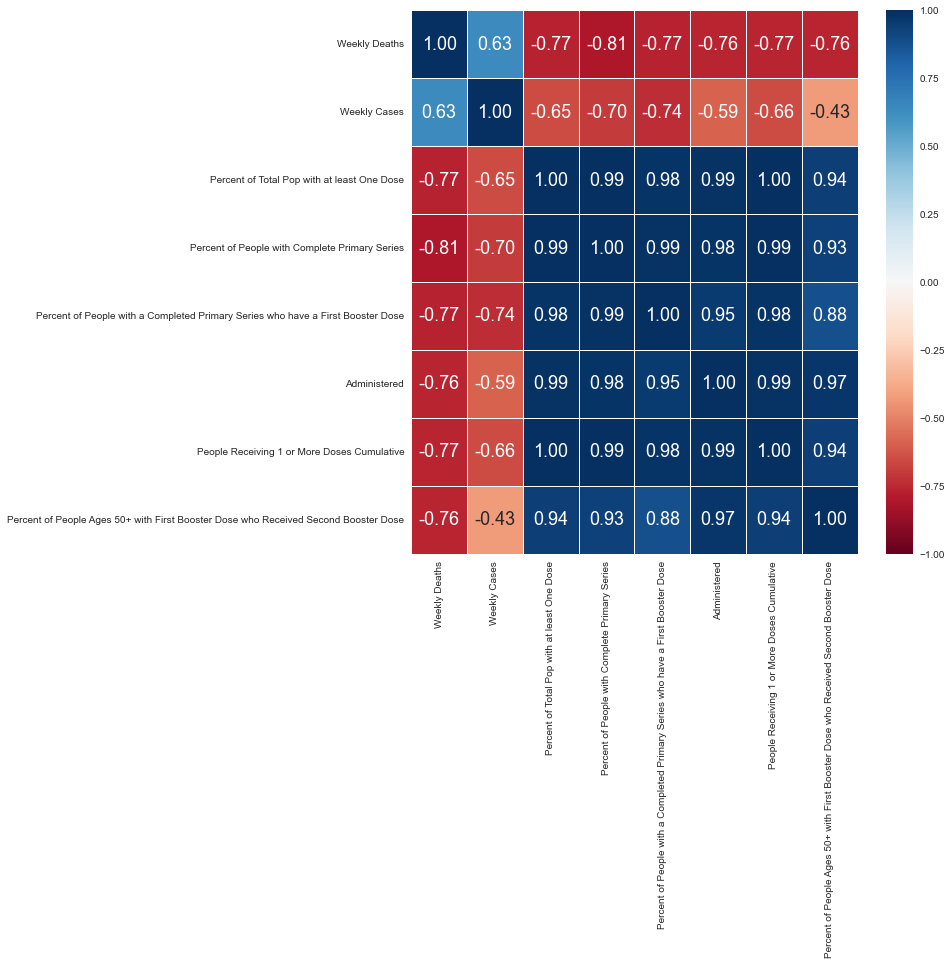

In [40]:
WeekDeathVac = pd.concat([WeekDeath.drop(columns=WeekDeath.columns[0], axis=1),AscendingVaccination.drop(columns=AscendingVaccination.columns[0:2], axis=1)],axis=1)

WeekDeathVac = WeekDeathVac.drop(41)

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10,10))
sb.heatmap(WeekDeathVac.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [56]:
WeekDeathVac = WeekDeathVac.reset_index()
WeekDeathVac = WeekDeathVac.drop(columns=WeekDeathVac.columns[0:2])

In [64]:
WeekDeathVac

,Weekly Deaths,Weekly Cases,Percent of Total Pop with at least One Dose,Percent of People with Complete Primary Series,Percent of People with a Completed Primary Series who have a First Booster Dose,Administered,People Receiving 1 or More Doses Cumulative,Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose
0,9523,4144938,74.5,63.8,39.4,532523597.0,247456745.0,0.8
1,12076,5489860,75.1,64.1,41.2,539630858.0,249319876.0,0.8
2,14401,5589403,75.5,64.4,42.4,545207423.0,250756791.0,0.9
3,17675,4401234,75.9,64.7,43.3,549748283.0,251888888.0,0.9
4,17299,2692886,76.1,65.0,43.8,553157166.0,252744602.0,1.0
5,16128,1482175,76.3,65.2,44.2,556064267.0,253483983.0,1.0
6,14920,924965,76.5,65.4,44.6,558534694.0,254102352.0,1.1
7,12631,547613,76.7,65.6,44.9,560571488.0,254614257.0,1.2
8,10556,367716,76.8,65.7,45.1,562109987.0,255013763.0,1.2
9,9560,254708,76.9,65.8,45.3,563421788.0,255355917.0,1.3


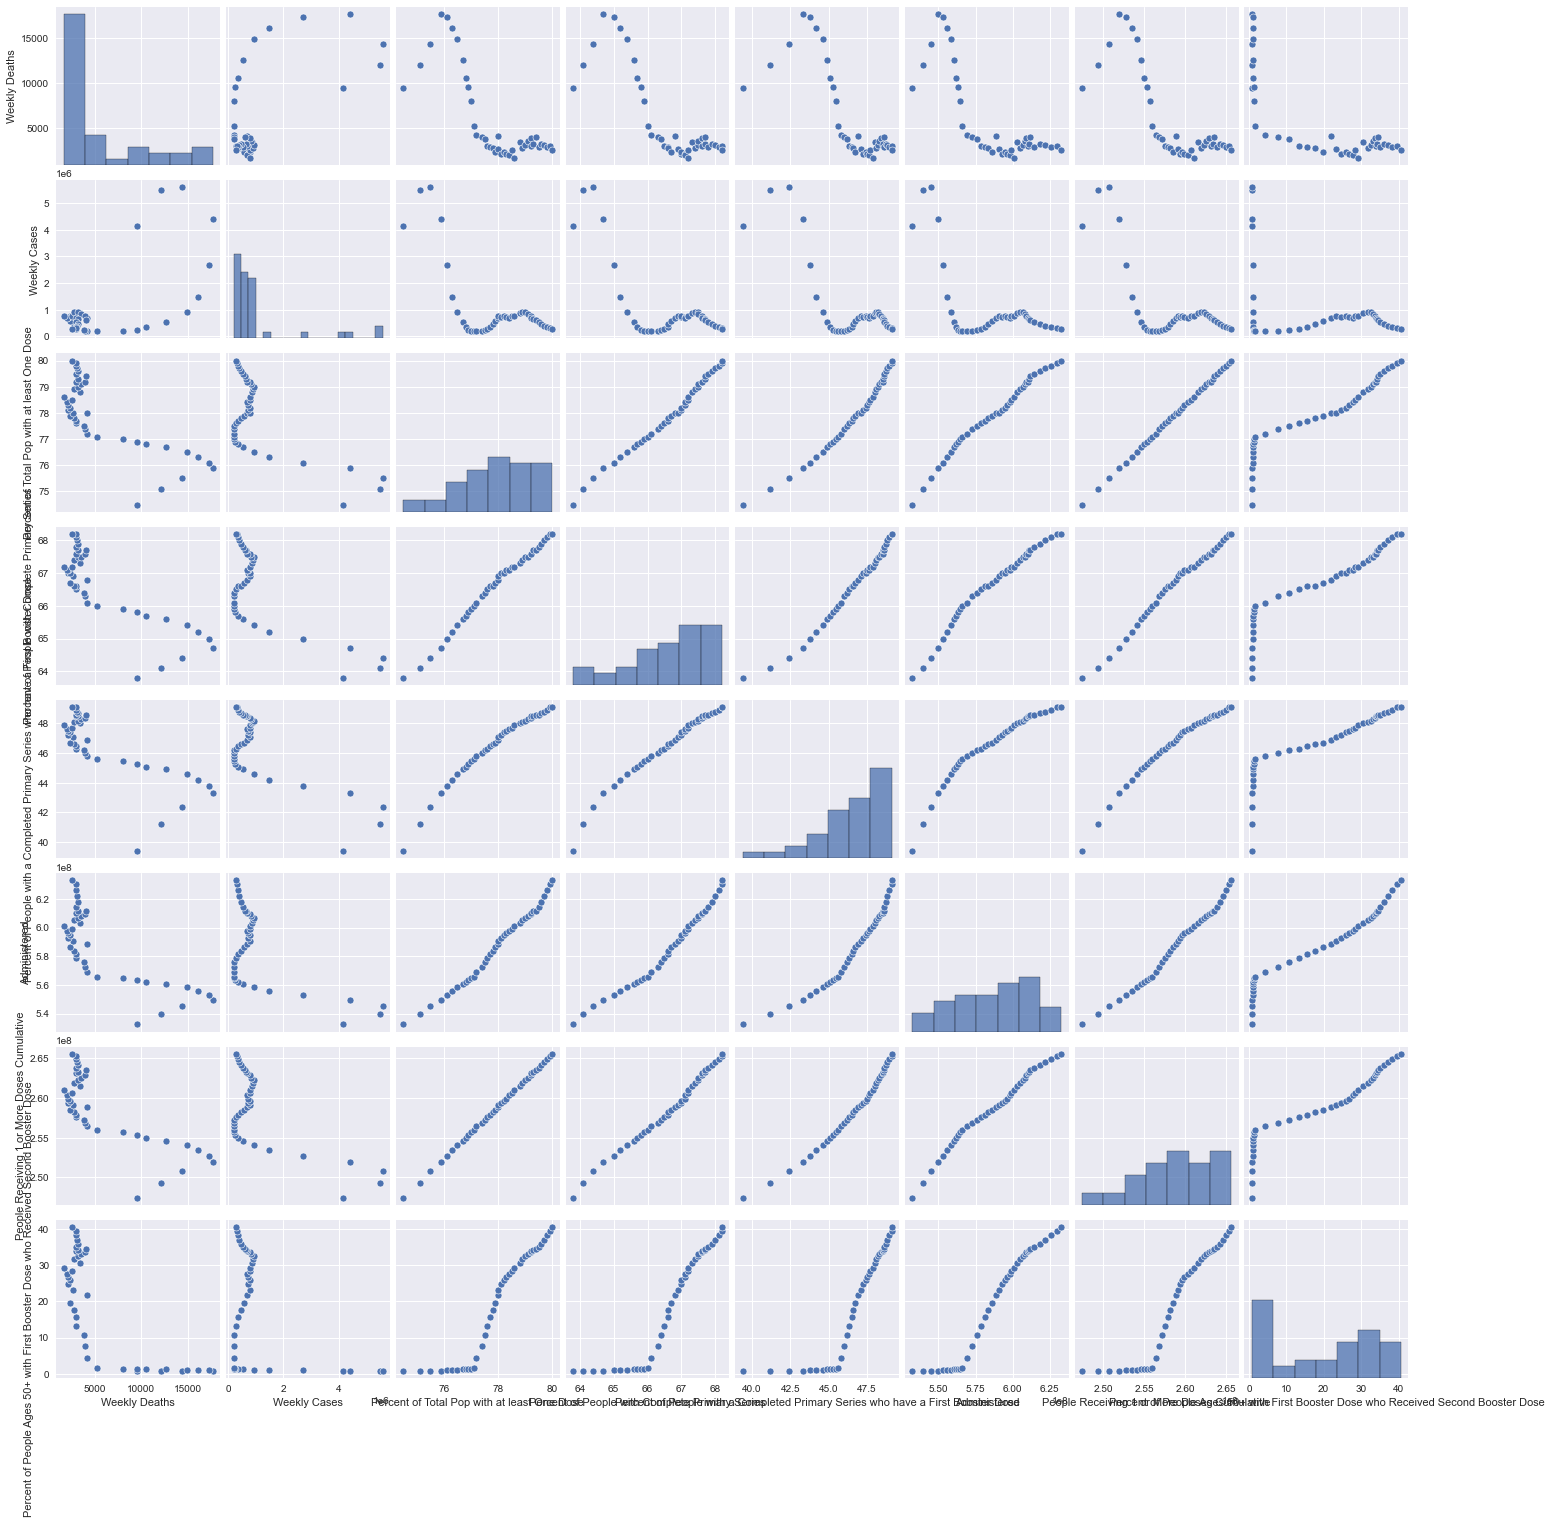

In [58]:
sb.pairplot(WeekDeathVac)

In [59]:
# Set the Parameters for Neighborhood
num_neighbors = 5      # Number of Neighbors
cont_fraction = 0.05    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(WeekDeathVac)

LocalOutlierFactor(contamination=0.05, n_neighbors=5)

<AxesSubplot:xlabel='Anomaly', ylabel='count'>

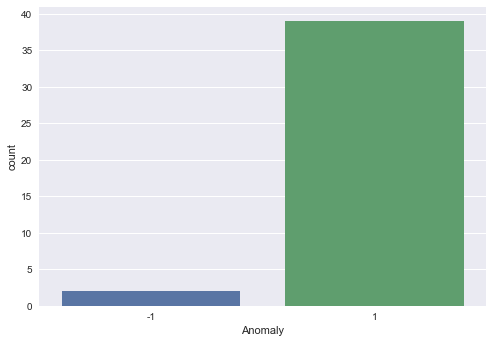

In [60]:
# Predict the Anomalies
labels = lof.fit_predict(WeekDeathVac)

# Append Labels to the Data
WeekDeathVac_labeled = WeekDeathVac.copy()
WeekDeathVac_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(WeekDeathVac_labeled["Anomaly"])

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

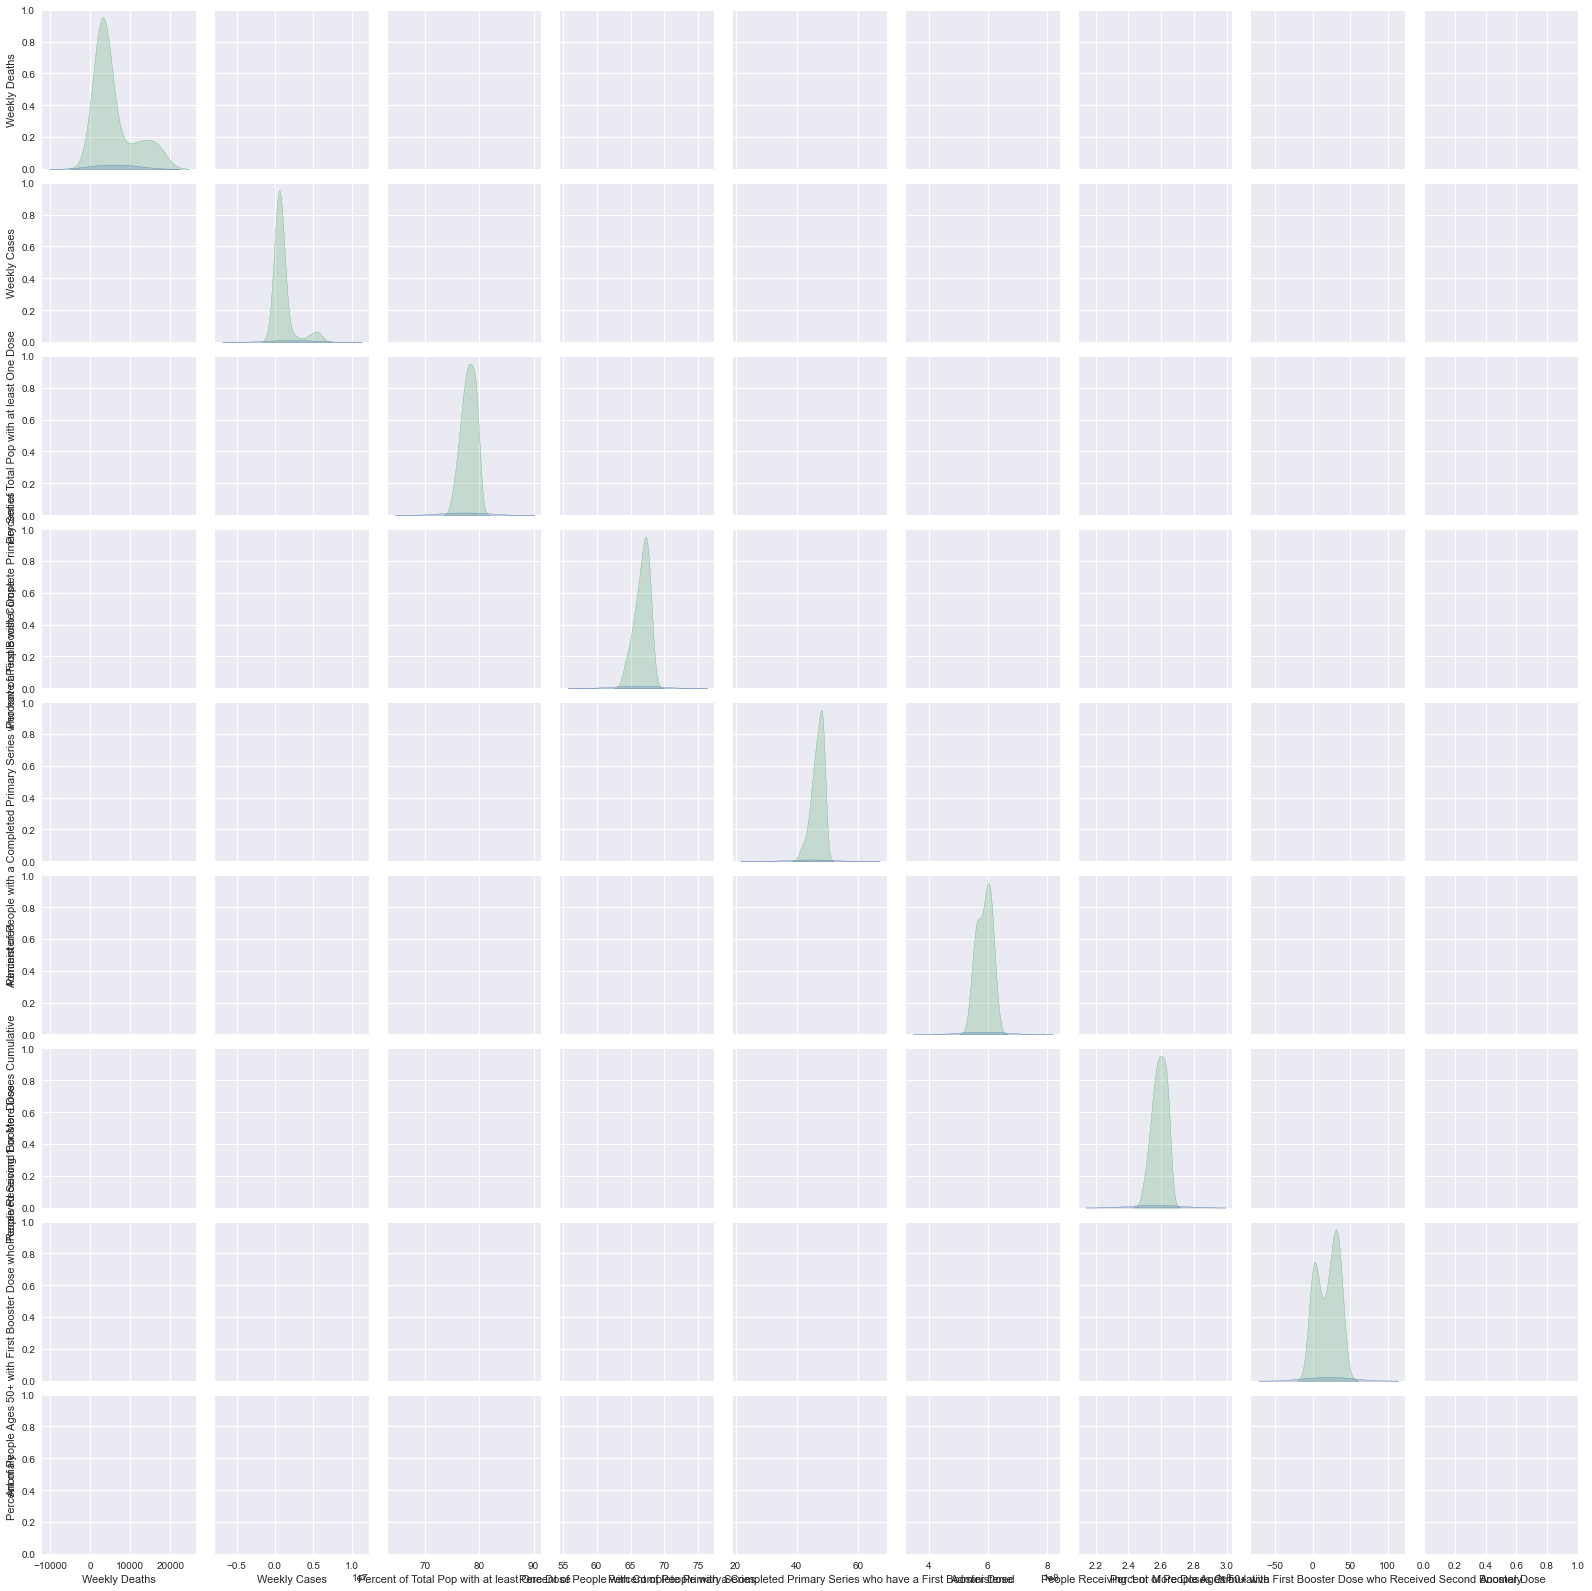

In [63]:
# Visualize the Anomalies in the Data
sb.pairplot(WeekDeathVac_labeled, vars = WeekDeathVac_labeled.columns.values, hue = "Anomaly")

ValueError: Could not interpret input 'Percent of Total Pop with at least One Dose	'

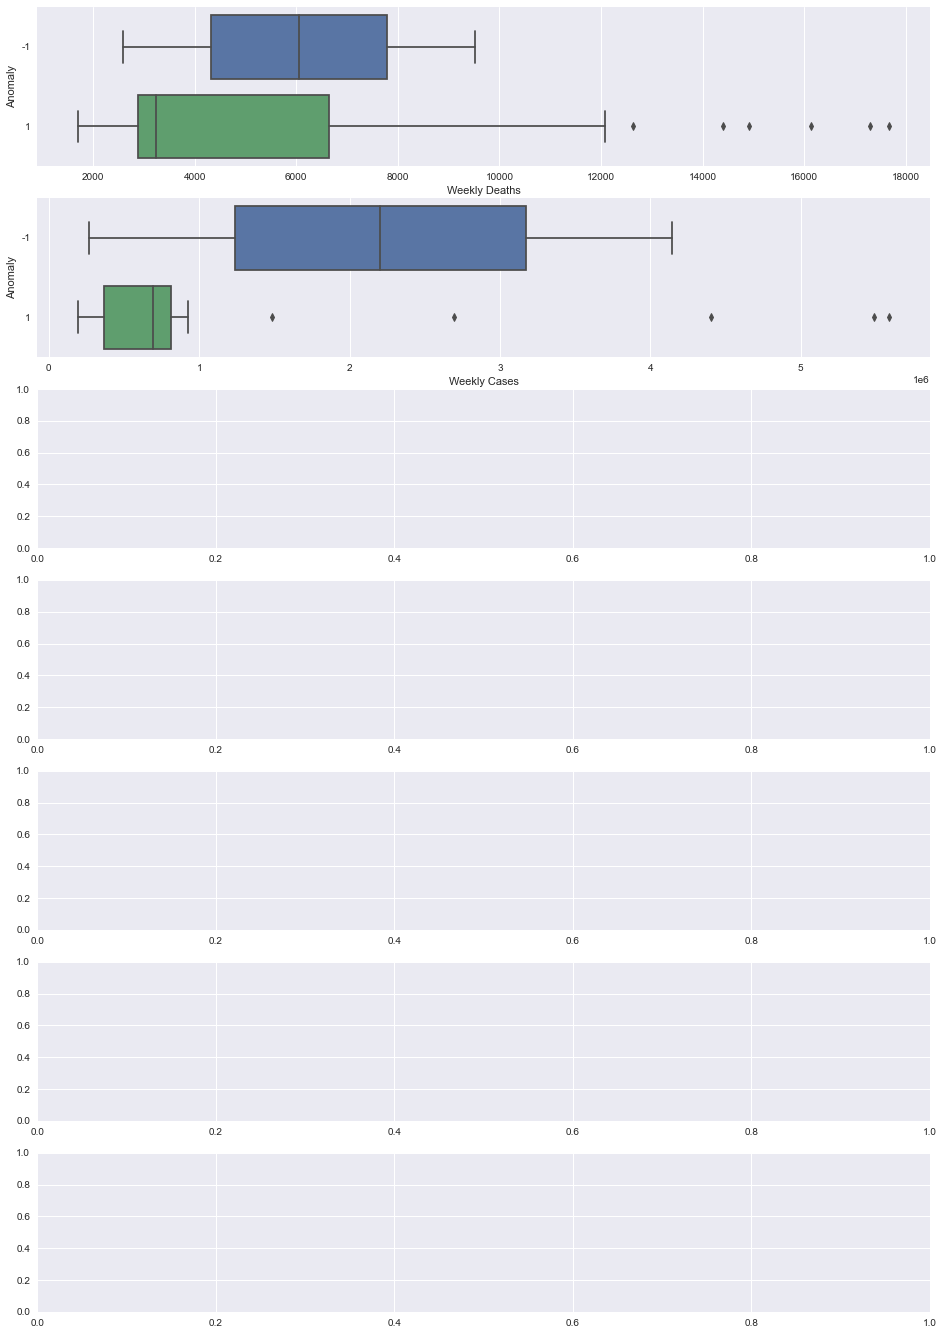

In [65]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(7, 1, figsize=(16,24))
sb.boxplot(x = 'Weekly Deaths', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[0])
sb.boxplot(x = 'Weekly Cases', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[1])
sb.boxplot(x = 'Percent of Total Pop with at least One Dose	', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[2])
sb.boxplot(x = 'Percent of People with a Completed Primary Series who have a First Booster Dose	', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[3])
sb.boxplot(x = 'Administered', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[4])
sb.boxplot(x = 'People Receiving 1 or More Doses Cumulative	', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[5])
sb.boxplot(x = 'Percent of People Ages 50+ with First Booster Dose who Received Second Booster Dose	', y = 'Anomaly', data = WeekDeathVac_labeled, ax = axes[6])

# New Section

In [21]:
#https://github.com/thaidaonguyen/Anomaly-Detection/blob/master/Anomaly%20Detection%20using%20K-Means%20Clustering.ipynb
K=np.arange(5, 30, 5)

#K=np.arange(1, 3)
from scipy.spatial.distance import cdist

meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Weekly_Death_Data["Weekly Deaths"].reshape(1, -1))
    meandistortions.append(sum(np.min(cdist(Weekly_Death_Data["Weekly Deaths"], kmeans.cluster_centers_, 'euclidean'), axis=1)) / 
                           Weekly_Death_Data["Weekly Deaths"].shape[0])
    print(k)

AttributeError: 'Series' object has no attribute 'reshape'

In [ ]:
 
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
#plt.show()

In [ ]:
#https://github.com/gprashmi/Anomaly-Detection-Using-K-means-Clustering/blob/master/.ipynb_checkpoints/anomaly_detection_k_means_clustering-checkpoint.ipynb
dataset=Weekly_Death_Data
data = dataset.values.tolist()


def canopy(data,feature,clu):
    initial_centroid = []   
    i = 1
    distances = 0
    centroids = []
    #select a random centroid from the dataset
    initial_centroid.append(np.reshape(random.choice(data),(1,feature)).tolist())

    #find the other centroids based on cluster, clu value
    while i < clu:
            
        data1 = copy.deepcopy(data)

        for j in initial_centroid:
            #sum the distances of all data points to a centroid
            distances += distance.cdist(j,data,metric = "euclidean")
            
        distnce = distances.flatten().tolist()
        max_dist = max(distnce)

        #keep track of repeating centroids
        while [data1[distnce.index(max_dist)]] in initial_centroid:
            del data1[distnce.index(max_dist)]
            del distnce[distnce.index(max_dist)]
            max_dist = max(distnce)

        #append the maximum distance point and next centroid
        initial_centroid.append((np.reshape(data1[distnce.index(max_dist)],(-1,feature))).tolist())

        #set distances back to zero for next cluster, k
        distances = 0
        i += 1

    #copy intial_centroids list to centroids list
    centroids = copy.deepcopy(initial_centroid)
    
    #intialise initial_centroid and i back to original values for next cluster iteration
    initial_centroid = []
    i = 1

    return centroids

In [ ]:
def kmeans_assign(centroids,data,dataset,feature):
    
    #find the distance of the data points to the each centroids
    for cen in range(len(centroids)):
        
        #create a column in the dataset df with the distances of data points from all the centroids
        #flatten() and tolist() are used to convert the distance numpy array generated and append to the column
        dataset["{}".format(cen)] = distance.cdist(centroids[cen],data,metric = "euclidean").flatten().tolist()
    
    #create the clusters column in the dataset df to assig the cluster
    #using idxmin(axis = 1), minimun distance is determined and corresponding column name is assigned in the cluster column
    dataset["clusters"] = dataset.iloc[:,feature:].astype(float).idxmin(axis = 1)

    #create a dictionary of datapoints as values and their cluster as keys
    data_dict = {}

    for clustr in dataset['clusters'].unique():        
        data_dict[clustr] = [[dataset[fea][y] for fea in range(0,feature)] for y in dataset[dataset['clusters'] == clustr].index]

    #copy the dataset to a final_df
    final_dataset = copy.deepcopy(dataset)
    #drop the columns for further iterations
    dataset.drop(dataset.iloc[:, feature:], axis = 1, inplace = True)
    
    return data_dict,dataset,final_dataset

In [ ]:
def kmeans_update(data_dict,feature,centroids):

    #create a dictionary with the mean values of the datapoints at cluster level
    avgDict = {}
    
    for k,v in data_dict.items():
        avgDict[k] = np.mean(v, axis = 0)

    #sort the dict to assign the centroids at their corresponding index
    avg_dict = sorted(avgDict.items())

    #update the centroids array with the mean centriod of each cluster
    for ad in range(len(avg_dict)):
        if str(ad) in avg_dict[ad]:
            centroids[ad] = [avg_dict[ad][1]]
 
    return centroids


In [ ]:
def silhoutte(data_dict,feature):
    
    #declare arrays for ai, bi, si
    ai = []
    max_int = float('inf')
    bi = []
    si = []
    
    for key,value in data_dict.items():
        
            #calculate ai
            for point in data_dict[key]:
                ai_dist = 0
                bi_dist = 0
                
                for sec_point in data_dict[key]:
                    if point != sec_point:                        
                         #intra cluster distance between point "i" to all points
                        ai_dist += distance.cdist([point],[sec_point],metric = "euclidean")
                    else:
                        continue
                    
                if len(data_dict[key]) == 1:
                    mean_ai = [ai_dist]
                else:
                    mean_ai = ai_dist / (len(data_dict[key]) - 1)
                
                ai.append(mean_ai)

                #calculate bi
                for ky,val in data_dict.items():
                    if ky != key:
                        #inter cluster distance between point "i" to all points in its neighboring cluster
                        bi_dist = distance.cdist([point],val,metric = "euclidean")
                    else:
                        continue

                    #mean bi for a cluster
                    cluster_bi_mean = np.mean(bi_dist)

                    #find the min bi between for point "i"
                    if cluster_bi_mean < max_int:
                        max_int = cluster_bi_mean
                
                bi.append(max_int)

    #calculate si
    for x in range(len(ai)):
        if ai[x] == bi[x] or ai[x] == 0:
            si_value = 0
            si.append(si_value)
        else:
            si_value = (bi[x] - ai[x]) / max(bi[x],ai[x])
            si.append(si_value)
    
    #calculate mean si for a cluster
    #mean_si = sum(si) / len(si)
    mean_si = np.mean(si)

    return mean_si

In [ ]:

def k_means(dataset,feature,data,clusters):
    
    initial_centroid = []   
    i = 1
    distances = 0
    centroids = []
    #sil_arr = []
    #max_si = 0
    sc = []
    
    for clu in clusters:

        #call the canopy function
        centroids = canopy(data,feature,clu)
        
        #find the best centroid by calling kmeans_assign and kmeans_update functions iteratively
        prev_centroid = [None] * len(centroids)
        cur_centroid = centroids

        while True:

            data_dict,dataset,final_dataset = kmeans_assign(cur_centroid,data,dataset,feature)
            #make a copy of current centroid to previous centroid
            prev_centroid = copy.deepcopy(cur_centroid)
            #update current centroid from the k_means update function
            cur_centroid = kmeans_update(data_dict,feature,cur_centroid)
            #find the error between prev_centroid and cur_centroid
            error = (np.sum(prev_centroid,axis = 0) - np.sum(cur_centroid,axis = 0))

            if error.all() == 0:
                break
            else:
                continue

        #call the kmeans_assign to complete the final assignment with best centroids
        data_dict,final_data_pts,final_dataset = kmeans_assign(cur_centroid,data,dataset,feature)
        
        #call silhoutte method
        #mean si value returned from silhouette
        sil = silhoutte(data_dict,feature)
        #print(sil)
        #sil = np.asscalar(sil)

        #intialise initial_centroid and i back to original values for next cluster iteration
        initial_centroid = []
        i = 1

        #check for cluster number, if k = 1, append sil = 0 to SC
        if clu == 1:
            sc.append(0)
        else:
            sc.append(sil)

    return data_dict,final_dataset,sc

In [ ]:

if dataset.isnull().values.any() or ~dataset.applymap(np.isreal).all().all():
    
    exit()

else:
    
    #create a list for the range of clusters
    cluster_range = [2**n for n in range(0,6)]
    
    '''
    call the k-means function
    kmeans_df = Is the final dataframe with datapoints assigned to their clusters
    sil_coeff = array of Silhouette coefficient for each cluster
    '''
    
    kmeans_dict,kmeans_df,sc = k_means(dataset,features,data,cluster_range)

    #to find optimum clusters,k
    min_sc = 0
    max_sc = float('inf')
    new_k = 0

    #find the cluster number where the sc values first decreases
    for sc_val in range(1,len(sc)-1):
        if sc[sc_val + 1] > sc[sc_val]:
            continue        
        else:
            new_k = sc_val + 1
            break

    #create a new clusters range to find optimum k
    #if cluster_range[new_k] == 2
    new_clu = [clus for clus in range(int(cluster_range[new_k] / (2**2)),cluster_range[new_k]+1)]

    k_means_dict,final_data_pts,sil_coef = k_means(dataset,feature,data,new_clu)

    max_sc = max(sil_coef)

    #get the optimum k
    optimum_k = [new_clu[sil_coef.index(max_sc)]]
    #perform k_means on optimum k
    final_dict,final_df,sil_coeff = k_means(dataset,feature,data,optimum_k)

    '''

    Anomaly Detection
    
    1. The small clusters with less than a threshold: A dictionary with clusters as keys and count of number of points as values is created. A threshold of 1% of the dataset  is
       calculated and based on the value count in the dictionary, anomalies are detected.
    2. Isolation data points not belong to any cluster: Based on above created dictionary, the clusters with values as 1 as detected as isolation points.
    3. A data point belongs to a cluster with more than 2 standard deviations: Mean, SD and Mean ± 2*SD for each dimension is calculated at cluster level and points not in this
       range as detected as anomalies.

    '''

    #create an anomaly array
    anomaly_array = []
    
    threshold = int(0.01 * len(data))

    #create array of final dataframe
    final_arr = final_df.values

    #dictionary with cluster and count of number of points
    cluster_len = {}

    for s in range(len(final_arr)):
        if final_arr[s][-1] in cluster_len:
            cluster_len[final_arr[s][-1]] += 1
        else:
            cluster_len[final_arr[s][-1]] = 1

    for clster,len_val in cluster_len.items():
        #detect isolation points
        if len_val == 1:
            anomaly_array.append(final_dict[clster])
        #detect clusters with points less than threshold
        elif len_val < threshold:
            for values in final_dict[clster]:
                anomaly_array.append(values)

    anamoly_dict = {}
    for clu_key,clu_val in final_dict.items():
        anamoly_dict[clu_key] = [(np.mean(clu_val,axis = 0) + 2*np.std(clu_val,axis = 0)).tolist(),(np.mean(clu_val,axis = 0) - 2*np.std(clu_val,axis = 0)).tolist()]
        
    z = 0
    for key1 in set(anamoly_dict.keys()) & set(final_dict.keys()):
        for value1 in final_dict[key1]:
            #check if each point is within the mean ± 2*SD range
            if ~(np.less(np.array(value1),np.array(anamoly_dict[key1][z])).any()) and np.greater(np.array(np.array(value1)),anamoly_dict[key1][z+1]).all():
                anomaly_array.append(value1)
            else:
                continue

    anomalies_array = [[np.round(float(i), 2) for i in nested] for nested in anomaly_array]
    
    if len(anomalies_array) == 0:
        print("No anomalies")
    else:
        for anomaly in anomalies_array:
            print(anomaly)

#Prediction Model

